# Training totals

This notebook explores my training for DJBB 2024 in Jamaica.

## Setup imports

In [80]:
import os, sys
import tempfile
import logging

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%aimport utils
%autoreload 1

sns.set_style("whitegrid")
pd.set_option('display.max_rows', 100)

In [2]:
# log level
logging.basicConfig(
    stream=sys.stdout,
    format='%(asctime)s %(levelname)s: %(message)s',
    level=logging.INFO)

logger = logging.getLogger("notebook")
logger.setLevel(logging.DEBUG)

# disable font not found warnings
logging.getLogger('matplotlib.font_manager').disabled = True

## Setup data directory

In [3]:
# Use Jupyter magic to retain variable in this notebook
%env DATA_DIRECTORY=data
dataset_name = "my_activity_data=20240508102713.csv"
directory = os.environ.get("DATA_DIRECTORY")
root_dir = tempfile.mkdtemp() if directory is None else directory
data_dir = os.path.join(root_dir, dataset_name)
print(f"Data root: {root_dir}, file: {data_dir}")

env: DATA_DIRECTORY=data
Data root: data, file: data/my_activity_data=20240508102713.csv


In [4]:
df = pd.read_csv(data_dir, parse_dates=['start_date', 'start_date_local'])

# Initial data exploration
Let's familiarize with Strava data dump.

In [5]:
df.shape

(149, 60)

In [6]:
df.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'average_watts', 'max_watts',
       'weighted_average_watts', 'kilojoules', 'device_watts', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'suffer_score', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.sum

In [60]:
df.type.unique()

array(['Run', 'Ride', 'Swim', 'Walk', 'Workout', 'VirtualRide',
       'WeightTraining'], dtype=object)

In [61]:
df.sport_type.unique()

array(['Run', 'Ride', 'Swim', 'Walk', 'Workout', 'VirtualRide',
       'WeightTraining'], dtype=object)

In [7]:
df.timezone.unique()

array(['(GMT-05:00) America/Jamaica', '(GMT+02:00) Europe/Helsinki',
       '(GMT+02:00) Africa/Blantyre', '(GMT+03:00) Africa/Addis_Ababa',
       '(GMT+00:00) Africa/Abidjan', '(GMT+00:00) GMT0',
       '(GMT+00:00) America/Danmarkshavn', '(GMT+00:00) GMT',
       '(GMT+00:00) Greenwich', '(GMT+00:00) UTC',
       '(GMT-01:00) America/Scoresbysund', '(GMT+02:00) Asia/Famagusta'],
      dtype=object)

In [ ]:
df.location_city.unique()

array([nan])

In [11]:
df.location_country.unique()

array(['Jamaica', 'Finland'], dtype=object)

In [33]:
df.utc_offset.unique()/3600

array([-5.,  2.,  3.,  0.])

In [27]:
zones = ['(GMT+02:00) Africa/Blantyre', '(GMT+03:00) Africa/Addis_Ababa',\
'(GMT+00:00) Africa/Abidjan', '(GMT+00:00) GMT0',\
'(GMT+00:00) America/Danmarkshavn', '(GMT+00:00) GMT',\
'(GMT+00:00) Greenwich', '(GMT+00:00) UTC',\
'(GMT-01:00) America/Scoresbysund', '(GMT+02:00) Asia/Famagusta']

for z in zones:
    for index, row in df.loc[df.timezone == z].iterrows():
        print("{}: {} in {} on {}".format(
            index, row.sport_type, row.location_country, row.start_date_local)
            )

99: Ride in Finland on 2024-01-25 19:31:56+00:00
100: Ride in Finland on 2024-01-25 18:47:33+00:00
115: Swim in Finland on 2024-01-04 11:16:02+00:00
123: Swim in Finland on 2023-05-06 11:09:41+00:00
128: WeightTraining in Finland on 2022-10-04 06:12:22+00:00
130: WeightTraining in Finland on 2022-09-28 06:12:01+00:00
131: WeightTraining in Finland on 2022-09-26 06:37:56+00:00
133: WeightTraining in Finland on 2022-09-23 13:56:47+00:00
137: WeightTraining in Finland on 2022-09-07 07:41:25+00:00
134: WeightTraining in Finland on 2022-09-20 13:23:33+00:00
135: WeightTraining in Finland on 2022-09-13 11:05:57+00:00
141: WeightTraining in Finland on 2022-08-25 15:01:11+00:00
144: WeightTraining in Finland on 2022-08-16 16:24:44+00:00
145: Swim in Finland on 2022-08-14 12:18:18+00:00


In [49]:
for i in [99, 100, 115, 123]:
    print(df.loc[i].timezone)

(GMT+02:00) Africa/Blantyre
(GMT+02:00) Africa/Blantyre
(GMT+02:00) Africa/Blantyre
(GMT+03:00) Africa/Addis_Ababa


NOTE, looks like these have just wrong timezone string. Index 123 has summer time too.

In [ ]:
df.loc[df.location_country == 'Finland'].head()

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,...,pr_count,total_photo_count,has_kudoed,suffer_score,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_temp
61,2,Morning Run,5253.5,2123,2211,42.1,Run,Run,0.0,10915643273,...,0,0,False,36.0,104560661,1,a10915643273,_iamBn_wsMJZB\Jb@`@|@b@t@Pj@`@rB?ZAZLDVAjBBFBL...,2,NaN
62,2,Morning Ride,30093.8,7768,9966,689.0,Ride,Ride,10.0,10909207443,...,0,3,False,53.0,104560661,1,a10909207443,ejbmBvausM{@jC[J{DoA{BwAMa@v@kCPgD}@OoA|@i@?oH...,2,19.0
63,2,Morning Ride,2272.1,442,468,34.0,Ride,Ride,NaN,10908205344,...,0,0,False,3.0,104560661,1,a10908205344,klamBrjvsMtAgArAwA|@y@fAk@b@Mt@Gf@B|@NzCv@j@JH...,2,23.0
64,2,Afternoon Walk,5839.1,4911,5396,83.2,Walk,Walk,NaN,10905815315,...,0,0,False,12.0,104560661,1,a10905815315,kebmBtfvsMFGOI?EGQICSUOBCMIGY@KAAA_@?IEAGo@YIM...,2,NaN
65,2,Afternoon Workout,0.0,5953,5953,0.0,Workout,Workout,NaN,10895075943,...,0,0,False,29.0,104560661,1,a10895075943,NaN,2,NaN


In [51]:
df.has_heartrate.describe()

count      149
unique       2
top       True
freq       125
Name: has_heartrate, dtype: object

In [ ]:
df.average_heartrate.describe()

count    125.000000
mean     120.892000
std       19.181399
min       78.600000
25%      106.800000
50%      121.400000
75%      138.400000
max      151.300000
Name: average_heartrate, dtype: float64

TODO looks like we could manually assign training zone for an exercise.

## Analyze data

### Finland pre-training

In [ ]:
# 2024 pre-training in Finland, during winter, make a copy(!)
df_fin = df.loc[
    (df.location_country == "Finland")
    & (df.start_date > "2024-01-01")
    & (df.start_date < "2024-02-14")
].copy()

# Fix timezone attribute
df_fin["start_date_local"] = (
    df_fin["start_date_local"].dt.tz_localize(None).dt.tz_localize("Europe/Helsinki")
)

In [145]:
df_fin.sport_type.unique()

array(['VirtualRide', 'Workout', 'Walk', 'WeightTraining', 'Ride', 'Swim'],
      dtype=object)

In [212]:
df_fin_weekly = (
    df_fin.groupby(
        pd.Grouper(key="start_date_local", freq="W-MON", label="left")
    ).moving_time.sum()
    / 3600
)
df_fin_weekly.head()

start_date_local
2024-01-01 00:00:00+02:00    2.010833
2024-01-08 00:00:00+02:00    4.961389
2024-01-15 00:00:00+02:00    3.238333
2024-01-22 00:00:00+02:00    4.190556
2024-01-29 00:00:00+02:00    5.092778
Freq: W-MON, Name: moving_time, dtype: float64

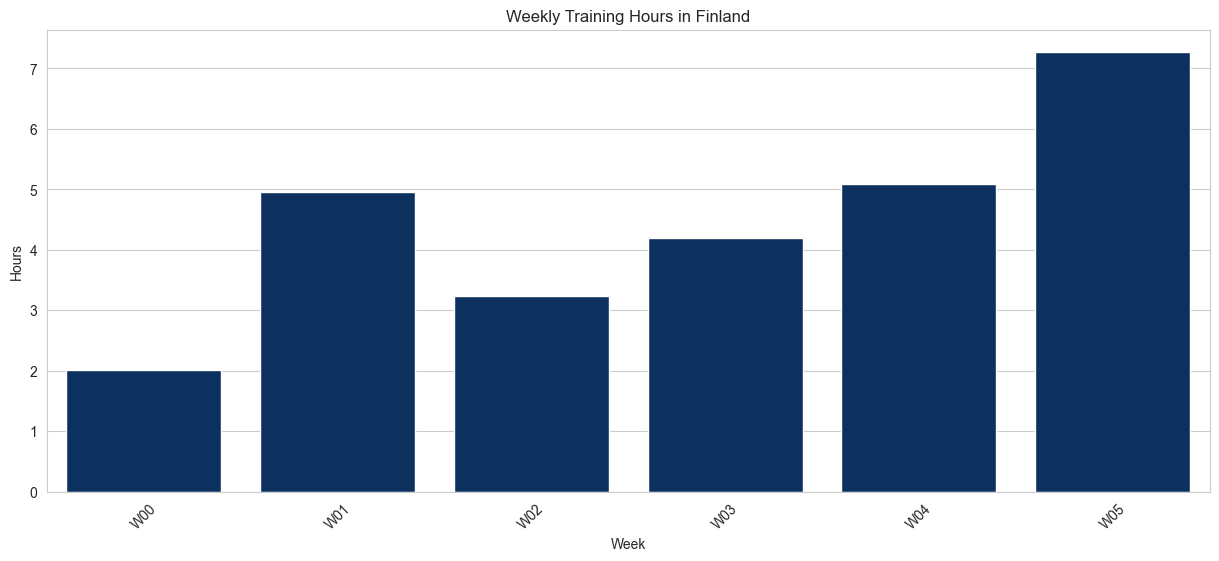

In [215]:
# Reset index to use for plotting
df_fin_weekly = df_fin_weekly.reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(
    x=df_fin_weekly["start_date_local"].dt.strftime("W%U"),
    y=df_fin_weekly["moving_time"],
    color=utils.colors["Finland flag blue"],
)

plt.title("Weekly Training Hours in Finland")
plt.ylabel("Hours")
plt.xlabel("Week")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#TODO compute percentages of each sport type

,index,start_date_local,moving_time
0,0,2024-01-01 00:00:00+02:00,2.010833
1,1,2024-01-08 00:00:00+02:00,4.961389
2,2,2024-01-15 00:00:00+02:00,3.238333
3,3,2024-01-22 00:00:00+02:00,4.190556
4,4,2024-01-29 00:00:00+02:00,5.092778
5,5,2024-02-05 00:00:00+02:00,7.278056


In [13]:
# 2024 training data
training = df.loc[(df.start_date > '2024-01-01') & (df.start_date_local < '2024-04-30')]

In [14]:
# DJBB 2024
race = df.loc[df.name.str.contains('DJBB')]

In [15]:
training.head()

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,...,pr_count,total_photo_count,has_kudoed,suffer_score,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_temp
8,2,Morning Ride,4780.4,987,1914,61.0,Ride,Ride,NaN,11291134982,...,0,0,False,NaN,104560661,1,a11291134982,ehcmBr~ssMv@X|@b@~CbA`@TFNCHqAhC[|@uBvE]`@a@Zm...,2,32.0
9,2,Morning Ride,49279.1,10733,17090,800.0,Ride,Ride,10.0,11284528671,...,19,1,False,61.0,104560661,1,a11284528671,ghcmBx~ssMbIlCjFeAC\xc@|RlEpDjO|TxBkAxFYhFqC`P...,2,26.0
10,2,Morning Ride,30850.8,6768,8325,694.0,Ride,Ride,10.0,11267859653,...,14,4,False,59.0,104560661,1,a11267859653,oycmBprrsM|@gAv@{C~@o@zAM|@JvGrDtBb@zO?tD~AvCV...,2,23.0
11,2,Lunch Swim,475.0,1807,1807,0.0,Swim,Swim,NaN,11262576995,...,0,2,False,12.0,104560661,1,a11262576995,NaN,2,NaN
12,2,Lunch Ride,6438.6,1353,8077,103.0,Ride,Ride,12.0,11263227838,...,0,0,False,NaN,104560661,1,a11263227838,ihcmBz~ssM~Al@hBj@bA^PJRD\AhAc@^ILIDQB]FmABKBE...,2,38.0


In [8]:
training.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'average_watts', 'max_watts',
       'weighted_average_watts', 'kilojoules', 'device_watts', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'suffer_score', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.sum

In [18]:
training.start_date

8     2024-04-29 14:13:35+00:00
9     2024-04-28 10:28:06+00:00
10    2024-04-26 10:14:14+00:00
11    2024-04-25 16:47:40+00:00
12    2024-04-25 16:34:37+00:00
                 ...           
111   2024-01-11 14:21:40+00:00
112   2024-01-09 09:17:47+00:00
113   2024-01-08 16:32:16+00:00
114   2024-01-07 08:22:49+00:00
115   2024-01-04 09:16:02+00:00
Name: start_date, Length: 108, dtype: datetime64[ns, UTC]

In [17]:
training.start_date_local

8     2024-04-29 09:13:35+00:00
9     2024-04-28 05:28:06+00:00
10    2024-04-26 05:14:14+00:00
11    2024-04-25 11:47:40+00:00
12    2024-04-25 11:34:37+00:00
                 ...           
111   2024-01-11 16:21:40+00:00
112   2024-01-09 11:17:47+00:00
113   2024-01-08 18:32:16+00:00
114   2024-01-07 10:22:49+00:00
115   2024-01-04 11:16:02+00:00
Name: start_date_local, Length: 108, dtype: datetime64[ns, UTC]

## Training statistics

In [24]:
from dateutil import relativedelta
 
def convert_seconds(n):
    rd = relativedelta.relativedelta(seconds=n)
    return "{}h {:02d}m".format(rd.days*24+rd.hours, rd.minutes)

In [25]:
# total training moving time
convert_seconds(training.moving_time.sum())

'113h 11m'

In [26]:
# for each sport
sport_types = list(training.type.unique())

for s in sport_types:
    total = training.loc[training.type == s].moving_time.sum()
    pretty_time = convert_seconds(total)
    print("{}: {}".format(s,pretty_time))

Ride: 60h 35m
Swim: 4h 13m
Walk: 11h 26m
Run: 4h 58m
Workout: 8h 27m
VirtualRide: 19h 13m
WeightTraining: 4h 16m


In [28]:
# for each sport
sport_types = list(training.type.unique())
totals_hr = []

for s in sport_types:
    total_s = training.loc[training.type == s].moving_time.sum()
    totals_hr.append(total_s / 3600)

totals_df = pd.DataFrame(data=totals_hr, index=sport_types, columns=['total moving time (h)'])

/tmp/ipykernel_110/3815723056.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


Text(0.5, 1.0, 'DJBB 2024 training')

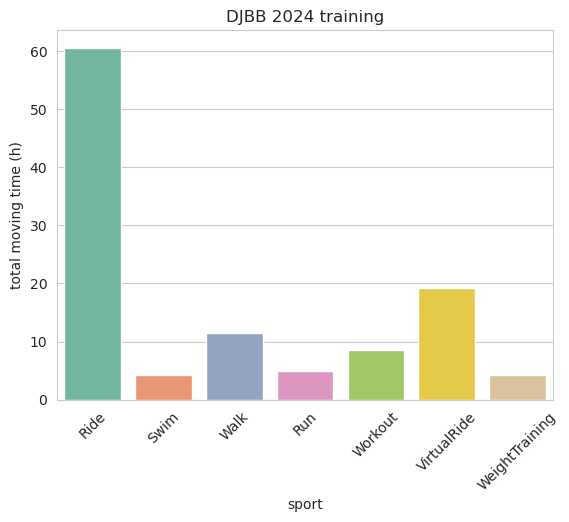

In [50]:
ax = sns.barplot(
    x=totals_df.index,
    y=totals_df['total moving time (h)'],
    palette=sns.color_palette("Set2", 7),
)
ax.tick_params(axis='x', rotation=45)
ax.set(xlabel='sport')
ax.set_title("DJBB 2024 training")

In [189]:
# riding hours and kilometers
ride_df =  training.loc[training.type == 'Ride']

total_km = ride_df.distance.sum() / 1000
active_wks = (17-8-2+1)
km_per_wk = total_km / active_wks

total_elevation_gain = ride_df.total_elevation_gain.sum()

print("Active riding weeks:", active_wks)
print("Average rides per week: {:.1f}".format(ride_df.shape[0]/active_wks))
print("Average km per week: {:.1f}".format(km_per_wk))
print("Total km: {:.1f}".format(total_km))
print("Total elevation gain (m): {:.0f}\n".format(total_elevation_gain))

Active riding weeks: 8
Average rides per week: 4.0
Average km per week: 166.1
Total km: 1328.9
Total elevation gain (m): 12106



In [182]:
# temperatures
ride_df.average_temp.describe()

count    32.000000
mean     26.687500
std       5.396758
min      19.000000
25%      23.000000
50%      25.500000
75%      30.250000
max      39.000000
Name: average_temp, dtype: float64

## DJBB2024 statistics

In [159]:
# total moving time
convert_seconds(race.moving_time.sum())

'26h 10m'

In [160]:
total_dist_km = race.distance.sum()/1000
print("Total distance: {:.1f} ({:.1f}miles)".format(total_dist_km, total_dist_km/1.6))

Total distance: 627.4 (392.1miles)


In [161]:
avg_spd_km = total_dist_km / (race.moving_time.sum()/3600)
print("Average speed: {:.1f}km ({:.1f}mph)".format(avg_spd_km, avg_spd_km/1.6))

Average speed: 24.0km (15.0mph)


In [196]:
total_elevation_gain_m = race.total_elevation_gain.sum()
print("Total elevation gain: {:.1f}m ({:.1f}feet)".format(
    total_elevation_gain_m,
    total_elevation_gain_m/.3048))

Total elevation gain: 5983.0m (19629.3feet)


In [183]:
# temperatures
race.average_temp.describe()

count     5.00000
mean     30.60000
std       1.67332
min      28.00000
25%      30.00000
50%      31.00000
75%      32.00000
max      32.00000
Name: average_temp, dtype: float64